In [1]:
# Carga todas las librerías
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st

In [4]:
# Carga los archivos de datos en diferentes DataFrames
companies_df = pd.read_csv('files/datasets/input/project_sql_result_01.csv')
neighborhoods_df = pd.read_csv('files/datasets/input/project_sql_result_04.csv')
trips_to_airport_df = pd.read_csv('files/datasets/input/project_sql_result_07.csv')

In [5]:
# Revisa los tipos de datos sean correctos
print(companies_df.info())
print()
print(neighborhoods_df.info())
print()
print(trips_to_airport_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2  

In [6]:
# Revisa de duplicados en companies_df
duplicates_companies = companies_df[companies_df.duplicated()]
if duplicates_companies.empty:
    print("No hay duplicados en companies_df.")
else:
    print("Duplicados en companies_df:")
    print(duplicates_companies)

No hay duplicados en companies_df.


In [7]:
# Revisa de Duplicados en neighborhoods_df
duplicates_neighborhoods = neighborhoods_df[neighborhoods_df.duplicated()]
if duplicates_neighborhoods.empty:
    print("\nNo hay duplicados en neighborhoods_df.")
else:
    print("\nDuplicados en neighborhoods_df:")
    print(duplicates_neighborhoods)


No hay duplicados en neighborhoods_df.


In [8]:
# Revisa de datos nulos en companies_df
null_info_companies = companies_df.isnull().sum()
print("\nEstos son los datos nulos existentes en companies_df:")
print(null_info_companies)


Estos son los datos nulos existentes en companies_df:
company_name    0
trips_amount    0
dtype: int64


In [9]:
# Revisa de Duplicados en neighborhoods_df
null_info_neighborhoods = neighborhoods_df.isnull().sum()
print("\nEstos son los datos nulos existentes en neighborhoods_df:")
print(null_info_neighborhoods)


Estos son los datos nulos existentes en neighborhoods_df:
dropoff_location_name    0
average_trips            0
dtype: int64


In [10]:
# Revisa de Duplicados en trips_to_airport_df
null_info_trips_to_airport = trips_to_airport_df.isnull().sum()
print("\nInformación sobre datos nulos en trips_to_airport_df:")
print(null_info_trips_to_airport)


Información sobre datos nulos en trips_to_airport_df:
start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


In [11]:
# Muestra las estadísticas descriptivas en companies_df
print("\nEstadísticas descriptivas en companies_df:")
print(companies_df.describe())


Estadísticas descriptivas en companies_df:
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000


In [12]:
# Muestra las estadísticas descriptivas básicas en neighborhoods_df
print("\nEstadísticas descriptivas en neighborhoods_df:")
print(neighborhoods_df.describe())


Estadísticas descriptivas en neighborhoods_df:
       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667


In [13]:
# Muestra las estadísticas descriptivas básicas en trips_to_airport_df
print("\nEstadísticas descriptivas en trips_to_airport_df:")
print(trips_to_airport_df.describe())


Estadísticas descriptivas en trips_to_airport_df:
       duration_seconds
count       1068.000000
mean        2071.731273
std          769.461125
min            0.000000
25%         1438.250000
50%         1980.000000
75%         2580.000000
max         7440.000000


In [14]:
# Visualización preliminar en companies_df
print("\nMuestra de datos en companies_df:")
display(companies_df.head())


Muestra de datos en companies_df:


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [15]:
# Visualización en neighborhoods_df
print("\nMuestra aleatoria de datos en neighborhoods_df:")
display(neighborhoods_df.head())


Muestra aleatoria de datos en neighborhoods_df:


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [16]:
# Visualización preliminar en trips_to_airport_df
print("\nMuestra de datos en trips_to_airport_df:")
display(trips_to_airport_df.head())


Muestra de datos en trips_to_airport_df:


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [17]:
# Ordena el dataframe de barrios por el promedio de viajes de mayor a menor
top_neighborhoods = neighborhoods_df.sort_values(by='average_trips', ascending=False).head(10)

# Redondea la columna 'average_trips' a dos decimales
top_neighborhoods['average_trips'] = top_neighborhoods['average_trips'].round(2)

display(top_neighborhoods)

,dropoff_location_name,average_trips
0,Loop,10727.47
1,River North,9523.67
2,Streeterville,6664.67
3,West Loop,5163.67
4,O'Hare,2546.90
5,Lake View,2420.97
6,Grant Park,2068.53
7,Museum Campus,1510.00
8,Gold Coast,1364.23
9,Sheffield & DePaul,1259.77


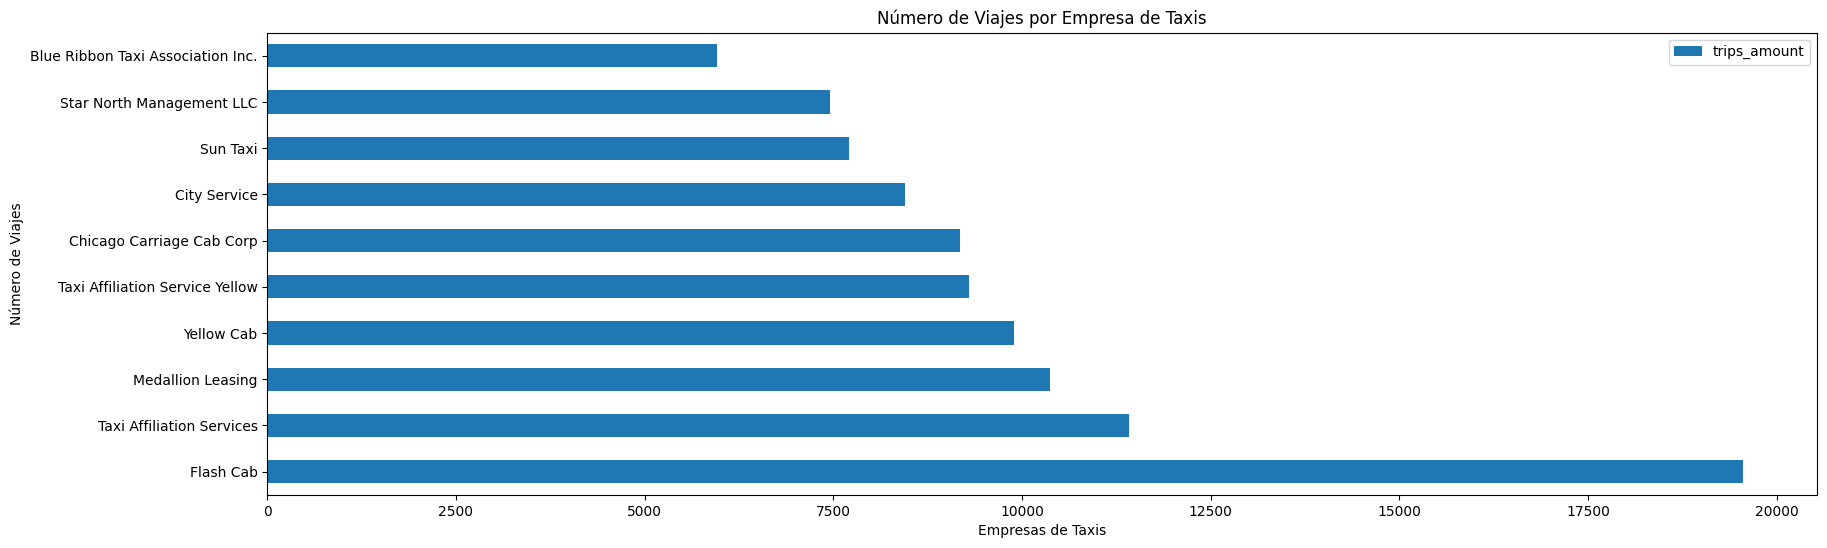

In [18]:
# Grafica el top 10 de empresas de taxis y número de viajes
top_companies = companies_df.sort_values(by='trips_amount', ascending=False).head(10)

top_companies.plot(kind='barh',
                  x='company_name', 
                  y='trips_amount', 
                  figsize=(20, 6), 
                  rot=0, 
                  title='Número de Viajes por Empresa de Taxis',
                  xlabel='Empresas de Taxis',
                  ylabel='Número de Viajes')
plt.show()

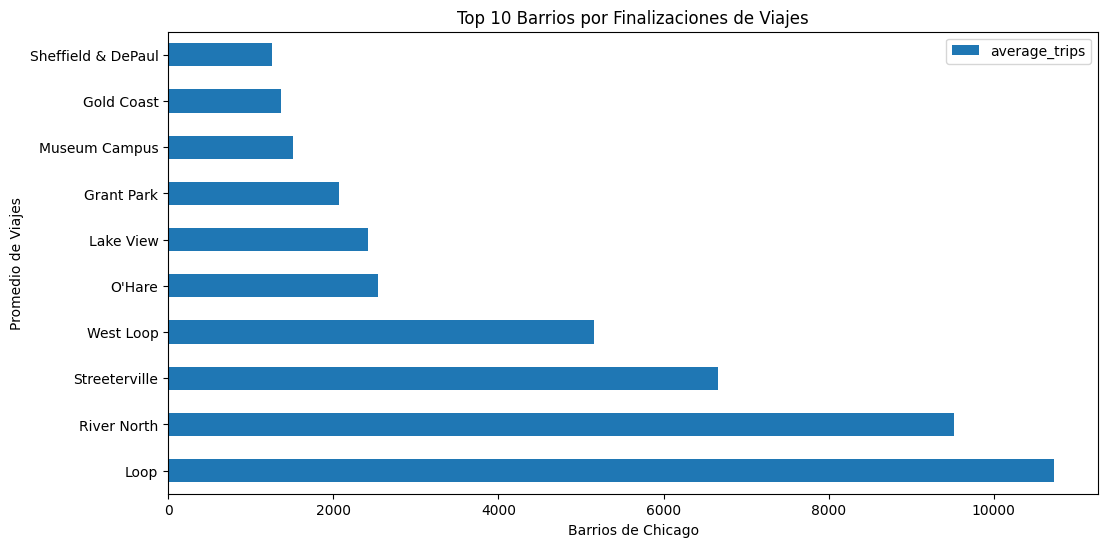

In [19]:
# Grafica los 10 principales barrios por número de finalizaciones
top_neighborhoods.plot(kind='barh', 
                       x='dropoff_location_name', 
                       y='average_trips', 
                       figsize=(12, 6), 
                       rot=0, 
                       title='Top 10 Barrios por Finalizaciones de Viajes',
                       xlabel='Barrios de Chicago',
                       ylabel='Promedio de Viajes')
plt.show()

Varianza de sábados lluviosos: 520294.086002483
Varianza de sábados no lluviosos: 576382.009689509


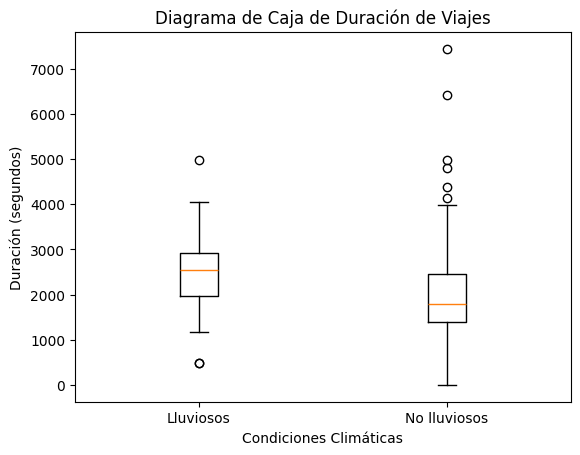

In [20]:
# Divide datos en sábados lluviosos y no lluviosos
rainy_saturdays = trips_to_airport_df[trips_to_airport_df['weather_conditions'] == 'Bad']['duration_seconds']
non_rainy_saturdays = trips_to_airport_df[trips_to_airport_df['weather_conditions'] == 'Good']['duration_seconds']

# Imprime la varianza
print("Varianza de sábados lluviosos:", rainy_saturdays.var())
print("Varianza de sábados no lluviosos:", non_rainy_saturdays.var())

# Visualiza la distribución mediante diagrama de caja
plt.boxplot([rainy_saturdays, non_rainy_saturdays], labels=['Lluviosos', 'No lluviosos'])
plt.title('Diagrama de Caja de Duración de Viajes')
plt.xlabel('Condiciones Climáticas')
plt.ylabel('Duración (segundos)')
plt.show()

In [21]:
# Realiza la prueba t de dos muestras independientes
t_statistic, p_value = st.ttest_ind(rainy_saturdays, non_rainy_saturdays)

In [22]:
# Compara p-value con nivel de significación
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Hay evidencia de que la duración promedio de los viajes cambia los sábados lluviosos.")
else:
    print("No podemos rechazar la hipótesis nula. No hay suficiente evidencia para afirmar que la duración promedio de los viajes cambia los sábados lluviosos.")

Rechazamos la hipótesis nula. Hay evidencia de que la duración promedio de los viajes cambia los sábados lluviosos.
